# Linear and Polynomial Regression

In [91]:
import itertools
import functools
import seaborn as sns
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

In [92]:
class LinReg():
    def __init__(self):
        self.t0 = 200
        self.t1 = 100000
    def predict (self, X):
        y = X @ self.w
        return y
    def loss (self, X, y):
        e = y - self.predict(X)
        return 0.5 *(e.T @ e)
    def rmse(self,X, y):
        return np.sqrt(2/X.shape[0] * self.loss(X, y))
    def fit(self, X, y):
        self.w = np.linalg.pinv(X) @ y
        return self.w
    def calculate_gradient(self, X, y):
        return X.T @ (self.predict(X) - y)
    def update_weights(self, grad, lr):
        return (self.w - lr * grad)
    def learning_schedule(self, t):
        return self.t0 / (self.t0 + self.t1)
    def gd(self, X, y, num_epochs, lr):
        self.w = np.zeros(X.shape[1])
        self.w_all = list() 
        self.err_all = list()
        for i in range(epochs):
            dJdw = calculate_gradient(X, y)
            self.w_all.append(self.w)
            self.err_all.append(self.loss(X, y))
            self.w = self.update_weights(dJdw, lr)
        return self.w
    def mbgd(self, X, y, num_epochs, batch_size):
        mini_batch_id = 0
        self.w = np.zeros(X.shape[1])  #initialising arbitrary values
        self.w_all = list() 
        self.err_all = list()

        for epoch in range(num_epochs):
            shuffled_indices = np.random.permutation(X.shape[0])
            X_shuffled = X[shuffled_indices]
            y_shuffled = y[shuffled_indices]

            for i in range(0, X.shape[0], batch_size):
                mini_batch_id += 1
                x1 = X_shuffled[i:i+batch_size]
                y1 = y_shuffled[i:i+batch_size]

                self.w_all.append(self.w)
                self.err_all.append(self.loss(X, y))

                dJdw = 2/batch_size * self.calculate_gradient(x1, y1)
                self.w = self.update_weights(dJdw, self.learning_schedule(mini_batch_id))

        return self.w
    
    def sgd(self, X, y, num_epochs):
        batch_size = 1
        mini_batch_id = 0
        self.w = np.zeros(X.shape[1])  #initialising arbitrary values
        self.w_all = list() 
        self.err_all = list()

        for epoch in range(num_epochs):
            shuffled_indices = np.random.permutation(X.shape[0])
            X_shuffled = X[shuffled_indices]
            y_shuffled = y[shuffled_indices]

            for i in range(0, X.shape[0], batch_size):
                mini_batch_id += 1
                x1 = X_shuffled[i:i+batch_size]
                y1 = y_shuffled[i:i+batch_size]

                self.w_all.append(self.w)
                self.err_all.append(self.loss(X, y))

                dJdw = 2/batch_size * self.calculate_gradient(x1, y1)
                self.w = self.update_weights(dJdw, self.learning_schedule(mini_batch_id))

        return self.w

In [93]:
import warnings
warnings.filterwarnings("ignore") 

In [94]:
def get_combinations(x, degree):
  return itertools.combinations_with_replacement(x, degree)

In [95]:
def compute_new_feature(items):
  #reduce (lambda x,y: x*y, [1,2,3,4,5]) calculates ((((1*2)*3)*4)*5)
  return functools.reduce(lambda x, y: x*y, items)

In [96]:
{items: compute_new_feature(items) for items in get_combinations([1], 3)} 

{(1, 1, 1): 1}

In [97]:
{items: compute_new_feature(items) for items in get_combinations([2,3], 3)}

{(2, 2, 2): 8, (2, 2, 3): 12, (2, 3, 3): 18, (3, 3, 3): 27}

In [98]:
{items: compute_new_feature(items) for items in get_combinations([1,4], 4)}

{(1, 1, 1, 1): 1,
 (1, 1, 1, 4): 4,
 (1, 1, 4, 4): 16,
 (1, 4, 4, 4): 64,
 (4, 4, 4, 4): 256}

In [99]:
def polynomial_transform(x, degree, logging=False):
  #converts to feature matrix
  if x.ndim == 1:
    x = x[:, None]

  x_t = x.transpose() #transpose of the feature matrix
  features = [np.ones(len(x))] #populates 1s as first feature for each example

  if logging:
    print("Input:", x)
  for degree in range(1, degree+1):
    for items in get_combinations(x_t, degree): #generate combinations
      features.append(compute_new_feature(items)) #combine features into a new feature
      if logging:
        print(items, ":", compute_new_feature(items))

  if logging:
    print(np.asarray(features).transpose())
  return np.asarray(features).transpose()

In [100]:
polynomial_transform(np.array([2]), 3, logging=True) 

Input: [[2]]
(array([2]),) : [2]
(array([2]), array([2])) : [4]
(array([2]), array([2]), array([2])) : [8]
[[1. 2. 4. 8.]]


array([[1., 2., 4., 8.]])

In [101]:
polynomial_transform(np.array([2,3]),2,logging=True)

Input: [[2]
 [3]]
(array([2, 3]),) : [2 3]
(array([2, 3]), array([2, 3])) : [4 9]
[[1. 2. 4.]
 [1. 3. 9.]]


array([[1., 2., 4.],
       [1., 3., 9.]])

In [102]:
polynomial_transform(np.array([[2,3],[4,5]]),2, logging=True)

Input: [[2 3]
 [4 5]]
(array([2, 4]),) : [2 4]
(array([3, 5]),) : [3 5]
(array([2, 4]), array([2, 4])) : [ 4 16]
(array([2, 4]), array([3, 5])) : [ 6 20]
(array([3, 5]), array([3, 5])) : [ 9 25]
[[ 1.  2.  3.  4.  6.  9.]
 [ 1.  4.  5. 16. 20. 25.]]


array([[ 1.,  2.,  3.,  4.,  6.,  9.],
       [ 1.,  4.,  5., 16., 20., 25.]])

In [103]:
polynomial_transform(np.array([[2,3],[4,5]]),3, logging=True)

Input: [[2 3]
 [4 5]]
(array([2, 4]),) : [2 4]
(array([3, 5]),) : [3 5]
(array([2, 4]), array([2, 4])) : [ 4 16]
(array([2, 4]), array([3, 5])) : [ 6 20]
(array([3, 5]), array([3, 5])) : [ 9 25]
(array([2, 4]), array([2, 4]), array([2, 4])) : [ 8 64]
(array([2, 4]), array([2, 4]), array([3, 5])) : [12 80]
(array([2, 4]), array([3, 5]), array([3, 5])) : [ 18 100]
(array([3, 5]), array([3, 5]), array([3, 5])) : [ 27 125]
[[  1.   2.   3.   4.   6.   9.   8.  12.  18.  27.]
 [  1.   4.   5.  16.  20.  25.  64.  80. 100. 125.]]


array([[  1.,   2.,   3.,   4.,   6.,   9.,   8.,  12.,  18.,  27.],
       [  1.,   4.,   5.,  16.,  20.,  25.,  64.,  80., 100., 125.]])

In [104]:
polynomial_transform(np.array([2]),0, logging=True)

Input: [[2]]
[[1.]]


array([[1.]])

# Regression Examples

In [105]:
# We generate training data with a single feature x1 and label y=sin(2Πx1) + noise
#create a training set where the output label is obtained by first 
#calculating sin(2*pi*x) and the adding a small random noise having
#a gaussian distribution
def create_nonlin_training_set(func, sample_size, std):
  x=np.linspace(0,1, sample_size)
  y=func(x)+np.random.normal(scale=std, size=x.shape)
  return x,y

def nonlin(x):
  return np.sin(2*np.pi*x)

In [106]:
def visualise_training_data(X_train, y_train):
    points = np.linspace(0, 1, 100)
    output = nonlin(points)
    
    plt.scatter(X_train, y_train, s=50, label="training data")
    plt.plot(points, output, c='g', label='$\sin(2 \pi x)$')
    
    plt.xlabel = "$x_1$"
    plt.ylabel = "y"
    plt.legend()
    plt.show()

In [107]:
def visualise_model_fit(X, y, lin_reg, degree):
    points = np.linspace(0, 1, 100)
    output = nonlin(points)
    
    if degree  > 0:
        plt.scatter(X, y, s=50, label="training data")
    plt.plot(points, output, c='g', label='$\sin(2 \pi x)$')
    
    y_hat = lin_reg.predict(polynomial_transform(points, degree,logging=False)) 
    plt.plot(points, y_hat, c='r', label='predicted')
    plt.xlabel = "$x_1$"
    plt.ylabel = "y"
    plt.legend()
    plt.show()

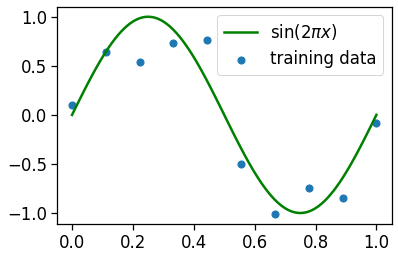

In [108]:
#[Activity] change the second parameter to different values
# and check the effect on the data-
#try 0.001, 0.01, 0.1, 1, 10
num_samples = 10
X,y = create_nonlin_training_set(nonlin, num_samples, 0.2)
visualise_training_data(X,y)

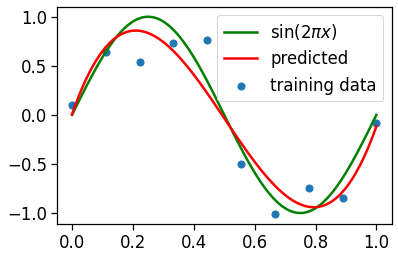

In [109]:
#[Activity] change the degree here and examine the fitment
degree = 3
X_transform = polynomial_transform(X, degree)
lin_reg = LinReg()
lin_reg.fit(X_transform, y)
visualise_model_fit(X,y,lin_reg,degree)

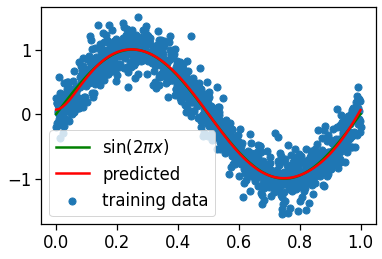

In [110]:
# As degree goes up overfitting can be seen, this can be fixed by increasing number of samples
num_samples = 1000
X,y = create_nonlin_training_set(nonlin, num_samples, 0.2)

degree = 9
X_transform = polynomial_transform(X, degree)
lin_reg = LinReg()
lin_reg.fit(X_transform, y)
visualise_model_fit(X,y,lin_reg,degree)


# Ridge Regression

In [111]:
# We've made changes to the LinReg class to get Ridge Regression
class LinReg():
    def __init__(self):
        self.t0 = 200
        self.t1 = 100000
    def predict (self, X):
        y = X @ self.w
        return y
    def loss (self, X, y, reg_rate):
        e = y - self.predict(X)
        return 0.5 *(e.T @ e) + (reg_rate/2) * (np.transpose(self.w) @ self.w)
    def rmse(self,X, y, reg_rate):
        return np.sqrt(2/X.shape[0] * self.loss(X, y, reg_rate))
    def fit(self, X, y, reg_rate):
        eye = np.eye(X.shape[1])
        self.w = np.linalg.solve(X.T @ X + reg_rate * eye, X.T @ y)
        return self.w
    def calculate_gradient(self, X, y, reg_rate):
        return X.T @ (self.predict(X) - y) + reg_rate * self.w
    def update_weights(self, grad, lr):
        return (self.w - lr * grad)
    def learning_schedule(self, t):
        return self.t0 / (self.t0 + self.t1)
    def gd(self, X, y, num_epochs, lr, reg_rate):
        self.w = np.zeros(X.shape[1])
        self.w_all = list() 
        self.err_all = list()
        for i in range(num_epochs):
            dJdw = self.calculate_gradient(X, y, reg_rate)
            self.w_all.append(self.w)
            self.err_all.append(self.loss(X, y, reg_rate))
            self.w = self.update_weights(dJdw, lr)
        return self.w
    def mbgd(self, X, y, num_epochs, batch_size):
        mini_batch_id = 0
        self.w = np.zeros(X.shape[1])  #initialising arbitrary values
        self.w_all = list() 
        self.err_all = list()

        for epoch in range(num_epochs):
            shuffled_indices = np.random.permutation(X.shape[0])
            X_shuffled = X[shuffled_indices]
            y_shuffled = y[shuffled_indices]

            for i in range(0, X.shape[0], batch_size):
                mini_batch_id += 1
                x1 = X_shuffled[i:i+batch_size]
                y1 = y_shuffled[i:i+batch_size]

                self.w_all.append(self.w)
                self.err_all.append(self.loss(X, y))

                dJdw = 2/batch_size * self.calculate_gradient(x1, y1)
                self.w = self.update_weights(dJdw, self.learning_schedule(mini_batch_id))

        return self.w
    
    def sgd(self, X, y, num_epochs):
        batch_size = 1
        mini_batch_id = 0
        self.w = np.zeros(X.shape[1])  #initialising arbitrary values
        self.w_all = list() 
        self.err_all = list()

        for epoch in range(num_epochs):
            shuffled_indices = np.random.permutation(X.shape[0])
            X_shuffled = X[shuffled_indices]
            y_shuffled = y[shuffled_indices]

            for i in range(0, X.shape[0], batch_size):
                mini_batch_id += 1
                x1 = X_shuffled[i:i+batch_size]
                y1 = y_shuffled[i:i+batch_size]

                self.w_all.append(self.w)
                self.err_all.append(self.loss(X, y))

                dJdw = 2/batch_size * self.calculate_gradient(x1, y1)
                self.w = self.update_weights(dJdw, self.learning_schedule(mini_batch_id))

        return self.w

In [112]:
X = np.array([[1,3,2,5],[1,9,4,7]])
y = np.array([6,11])
w = np.ones(X.shape[1])
reg_rate = 0.01

l = LinReg()
l.w = w

l.loss(X, y, reg_rate)
l.calculate_gradient(X, y, reg_rate)

array([ 15.01, 105.01,  50.01,  95.01])

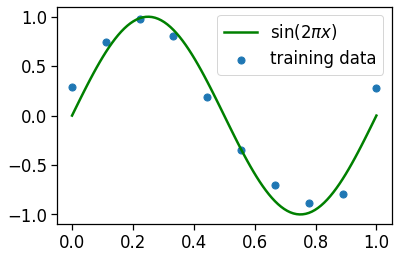

In [113]:
num_samples = 10
x, y = create_nonlin_training_set(nonlin, num_samples, 0.2)
visualise_training_data(x, y)

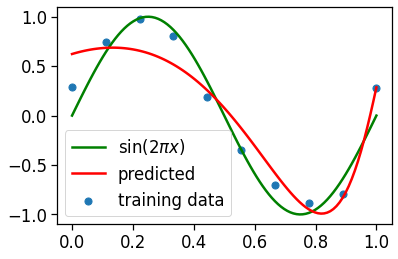

In [114]:
degree = 20
X_transform = polynomial_transform(x, degree,logging=False)
lin_reg = LinReg()
lin_reg.fit(X_transform, y, reg_rate)
visualise_model_fit(x, y, lin_reg, degree)

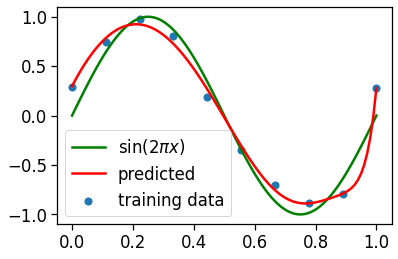

In [115]:
#reducing reg rate gives better fit, too much regulazation will cause underfitting though
reg_rate = 0.0001
degree = 20
X_transform = polynomial_transform(x, degree,logging=False)
lin_reg = LinReg()
lin_reg.fit(X_transform, y, reg_rate)
visualise_model_fit(x, y, lin_reg, degree)

In [116]:
#Create the training set
num_samples = 10
x, y = create_nonlin_training_set(nonlin, num_samples, 0.2)

#Transform it
degree = 9
X_transform = polynomial_transform(x, degree,logging=False)

In [117]:
#Create the validation set
x_val = np.linspace(0, 1, 100)
y_val = nonlin(x_val)

#Transform it
degree = 9
X_val_transform = polynomial_transform(x_val, degree,logging=False)

In [118]:
w_dict = dict()
training_errors = dict()
val_errors = dict()

for reg_rate in [10,1,0.1,0.01,0.001, 0.0001]:
    lin_reg = LinReg()
    #Find the rmse for training set.
    lin_reg.fit(X_transform, y, reg_rate)
    w_dict[reg_rate] = lin_reg.w
    training_errors[reg_rate] = lin_reg.rmse(X_transform, y, reg_rate)
    #Find the rmse for validation set
    lin_reg.fit(X_val_transform, y_val, reg_rate)
    val_errors[reg_rate] = lin_reg.rmse(X_val_transform, y_val + 
                                        np.random.normal(scale=0.25, size=len(y_val)), reg_rate)
err_df = pd.DataFrame([training_errors, val_errors], index=['Training errors', 'Validation Errors']).T
w_df = pd.DataFrame(w_dict)

In [119]:
def plot_learning_curves(losses):
    plt.plot(losses)

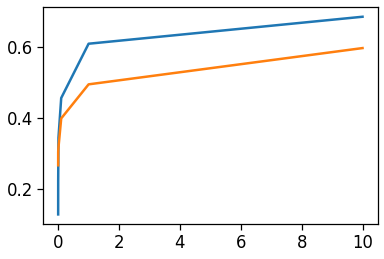

In [120]:
plot_learning_curves(err_df)

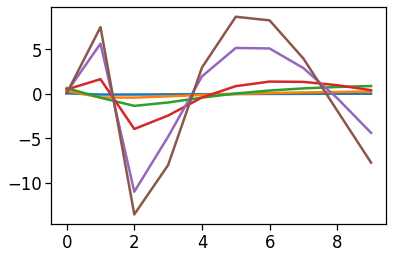

In [121]:
plot_learning_curves(w_df)

# Lasso Regression

In [122]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error


w_dict = dict()
training_errors = dict()
val_errors = dict()

for reg_rate in [10,1,0.1,0.01,0.001, 0.0001]:
    lasso = Lasso(alpha=reg_rate)
    lasso.fit(X_transform, y)

    w_dict[reg_rate] = lasso.coef_

    training_errors[reg_rate] = mean_squared_error(y, lasso.predict(X_transform))
    val_errors[reg_rate] = mean_squared_error(y_val + np.random.normal(scale=0.25, size=len(y_val)), 
                                                             lasso.predict(X_val_transform))

err_df = pd.DataFrame([training_errors, val_errors], index=['Training errors', 'Validation Errors']).T
w_df = pd.DataFrame(w_dict)

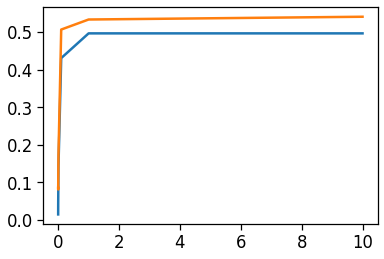

In [123]:
plot_learning_curves(err_df)

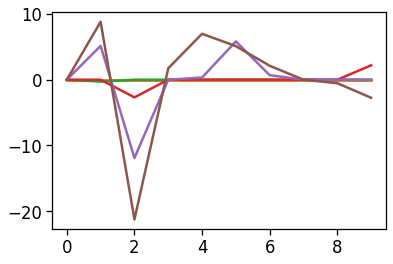

In [124]:
plot_learning_curves(w_df)

# Multi-Output Regression

In [125]:
from sklearn.datasets import make_regression
X, y, w = make_regression(n_samples=100, n_features=10, n_informative=10, 
                bias=1, n_targets=5, shuffle=True, coef=True, random_state=42)

In [126]:
print(X.shape, y.shape, w.shape)

(100, 10) (100, 5) (10, 5)


In [127]:
def add_dummy_feature(x):
    return np.column_stack((np.ones(x.shape[0]), x))

In [128]:
def preprocess(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    X_train = add_dummy_feature(X_train)
    return X_train, X_test, y_train, y_test

In [129]:
X_train, X_test, y_train, y_test = preprocess(X, y)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(80, 11) (20, 10) (80, 5) (20, 5)


In [130]:
# Modifying the LinReg class to support multi-output. Note, apart from 
#the weight vector intialiazation, all else remains same as before

class LinReg():
    def __init__(self):
        self.t0 = 200
        self.t1 = 100000
    def predict (self, X):
        y = X @ self.w
        return y
    def loss (self, X, y, reg_rate):
        e = y - self.predict(X)
        return 0.5 *(e.T @ e) + (reg_rate/2) * (np.transpose(self.w) @ self.w)
    def rmse(self,X, y, reg_rate):
        return np.sqrt(2/X.shape[0] * self.loss(X, y, reg_rate))
    def fit(self, X, y, reg_rate):
#         self.w = np.linalg.pinv(X) @ y
        eye = np.eye(X.shape[1])
        self.w = np.linalg.solve(X.T @ X + reg_rate * eye, X.T @ y)
        return self.w
    def calculate_gradient(self, X, y, reg_rate):
        return X.T @ (self.predict(X) - y) + reg_rate * self.w
    def update_weights(self, grad, lr):
        return (self.w - lr * grad)
    def learning_schedule(self, t):
        return self.t0 / (self.t0 + self.t1)
    def gd(self, X, y, num_epochs, lr, reg_rate):
        self.w = np.zeros((X.shape[1], y.shape[1]))
        self.w_all = list() 
        self.err_all = list()
        for i in range(num_epochs):
            dJdw = self.calculate_gradient(X, y, reg_rate)
            self.w_all.append(self.w)
            self.err_all.append(self.loss(X, y, reg_rate))
            self.w = self.update_weights(dJdw, lr)
        return self.w
    def mbgd(self, X, y, num_epochs, batch_size):
        mini_batch_id = 0
        self.w = np.zeros(X.shape[1])  #initialising arbitrary values
        self.w_all = list() 
        self.err_all = list()

        for epoch in range(num_epochs):
            shuffled_indices = np.random.permutation(X.shape[0])
            X_shuffled = X[shuffled_indices]
            y_shuffled = y[shuffled_indices]

            for i in range(0, X.shape[0], batch_size):
                mini_batch_id += 1
                x1 = X_shuffled[i:i+batch_size]
                y1 = y_shuffled[i:i+batch_size]

                self.w_all.append(self.w)
                self.err_all.append(self.loss(X, y))

                dJdw = 2/batch_size * self.calculate_gradient(x1, y1)
                self.w = self.update_weights(dJdw, self.learning_schedule(mini_batch_id))

        return self.w
    
    def sgd(self, X, y, num_epochs):
        batch_size = 1
        mini_batch_id = 0
        self.w = np.zeros(X.shape[1])  #initialising arbitrary values
        self.w_all = list() 
        self.err_all = list()

        for epoch in range(num_epochs):
            shuffled_indices = np.random.permutation(X.shape[0])
            X_shuffled = X[shuffled_indices]
            y_shuffled = y[shuffled_indices]

            for i in range(0, X.shape[0], batch_size):
                mini_batch_id += 1
                x1 = X_shuffled[i:i+batch_size]
                y1 = y_shuffled[i:i+batch_size]

                self.w_all.append(self.w)
                self.err_all.append(self.loss(X, y))

                dJdw = 2/batch_size * self.calculate_gradient(x1, y1)
                self.w = self.update_weights(dJdw, self.learning_schedule(mini_batch_id))

        return self.w

In [131]:
# Generating weight vector using fit method

lin_reg = LinReg()
w_fit = lin_reg.fit(X_train, y_train, 0)
w_fit.shape

(11, 5)